In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# ML

In [7]:
df = pd.read_csv("breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [11]:
numerical_cols=df.select_dtypes(include=['float64','int64']).columns

In [12]:
numerical_cols=numerical_cols[:-1]

In [13]:
df[numerical_cols]=scaler.fit_transform(df[numerical_cols])

In [14]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.000915,M,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.11890
1,0.000915,M,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.08902
2,0.092495,M,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.08758
3,0.092547,M,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.17300
4,0.092559,M,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.001007,M,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.07115
565,0.001007,M,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.06637
566,0.001008,M,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.07820
567,0.001008,M,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.12400


In [15]:
df.shape

(569, 32)

In [16]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['diagnosis']=le.fit_transform(df['diagnosis'])

In [17]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.000915,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.11890
1,0.000915,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.08902
2,0.092495,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.08758
3,0.092547,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.17300
4,0.092559,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.001007,1,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.07115
565,0.001007,1,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.06637
566,0.001008,1,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.07820
567,0.001008,1,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.12400


In [18]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.4,random_state=42)

In [ ]:
model=GaussianNB()

In [ ]:
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
#accuracy

print(model.score(X_test, y_test))

0.9429824561403509


In [ ]:
accuracy_NB=accuracy_score(y_test,y_pred)
print(accuracy_NB)

0.9429824561403509


In [ ]:
#Decision tree

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model1=DecisionTreeClassifier()

In [ ]:
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=model1.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1])

In [ ]:
accuracy_DT=accuracy_score(y_test,y_pred)
print(accuracy_DT)

0.9298245614035088


In [ ]:
#Random Forest

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model2=RandomForestClassifier()

In [ ]:
model2.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=model2.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
accuracy_RF=accuracy_score(y_test,y_pred)
print(accuracy_DT)

0.9298245614035088


In [ ]:
#SVM

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model3=SVC()

In [ ]:
model3.fit(X_train,y_train)

SVC()

In [ ]:
y_pred=model3.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [ ]:
accuracy_SVM=accuracy_score(y_test,y_pred)
print(accuracy_SVM)

0.9736842105263158


In [ ]:
#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model4=KNeighborsClassifier(n_neighbors=3)

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model4.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred=model4.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [ ]:
accuracy_KNN=accuracy_score(y_test,y_pred)
print(accuracy_KNN)

0.9649122807017544


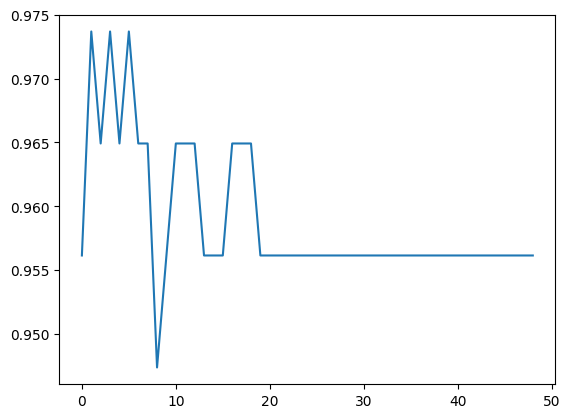

In [ ]:
acc=[]
for i in range(1,50):
    m=KNeighborsClassifier(n_neighbors=i)
    m.fit(X_train,y_train)
    y_pred=m.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred))
plt.plot(acc)

In [ ]:
acc[3]

0.9736842105263158

In [ ]:
model4=KNeighborsClassifier(n_neighbors=3)
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)
model4.fit(X_train,y_train)
y_pred=model4.predict(X_test)
accuracy_KNN=accuracy_score(y_test,y_pred)

In [ ]:
#Logistic Resgression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model5=LogisticRegression()

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
model5.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=model5.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
accuracy_LR=accuracy_score(y_test,y_pred)
print(accuracy_LR)

0.9707602339181286


In [ ]:
#plot

In [ ]:
y_plot=[accuracy_NB,accuracy_DT,accuracy_RF,accuracy_SVM,accuracy_KNN,accuracy_LR]
X_plot=['NB','DT','RF','SVM','KNN','LR']

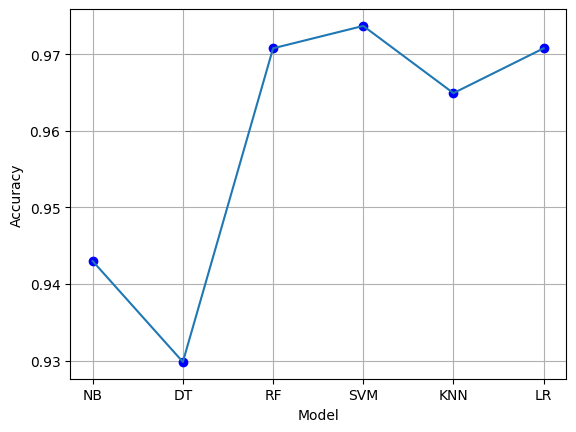

In [ ]:
plt.plot(X_plot, y_plot, 'o', color='blue')
plt.plot(X_plot, y_plot)
plt.grid(True)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
import pickle

In [ ]:
with open("NB_model","wb") as handler1:
    pickle.dump(model,handler1)


In [ ]:
with open("DT_model","wb") as handler2:
    pickle.dump(model1, handler2)

In [ ]:
with open("RF_model","wb") as handler3:
    pickle.dump(model2,handler3)

In [ ]:
with open("SVM_model","wb") as handler4:
    pickle.dump(model3,handler4)

In [ ]:
with open("KNN_model","wb") as handler5:
    pickle.dump(model4,handler5)

In [ ]:
with open("LR_model","wb") as handler6:
    pickle.dump(model5,handler6)

# DL

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
dl_model = Sequential()
dl_model.add(Dense(500, input_dim=31, activation='relu'))
dl_model.add(Dense(100, activation='relu'))
dl_model.add(Dense(50, activation='relu'))
dl_model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
dl_model.compile(optimizer='adam',
         loss='binary_crossentropy',
         metrics=['accuracy'])

dl_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7357 - loss: 0.6582
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8579 - loss: 0.5025
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9074 - loss: 0.3160
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8982 - loss: 0.2514
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9220 - loss: 0.1940
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9534 - loss: 0.1313
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9689 - loss: 0.1102 
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9652 - loss: 0.1211 
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9617 - loss: 0.1123 
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9655 - loss: 0.0978 
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9806 - loss: 0.0813 
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accu

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_pred_dl = dl_model.predict(X_test)
y_pred_dl = (y_pred_dl > 0.5) #converting into binary 1 and 0


cm = confusion_matrix(y_test,y_pred_dl)
print("Confusion Matrix: ")
print(cm)

cr = classification_report(y_test,y_pred_dl)
print("Classification Report: ")
print(cr)

acc = accuracy_score(y_test,y_pred_dl)
print("Accuracy: ",acc)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Confusion Matrix: 
[[106   2]
 [  2  61]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Accuracy:  0.9766081871345029


In [ ]:
with open("DL_model","wb") as handler7:
    pickle.dump(dl_model,handler7)

# QML

In [19]:
!pip install qiskit==1.4.2
!pip install qiskit-machine-learning
!pip install qiskit-aer
!pip install qiskit-algorithms
from IPython import display
display.clear_output()

In [20]:
!pip list | grep qiskit

qiskit                                1.4.2
qiskit-aer                            0.17.0
qiskit-algorithms                     0.3.1
qiskit-machine-learning               0.8.2


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from qiskit import QuantumCircuit
from qiskit.primitives import Sampler
from qiskit.result import QuasiDistribution
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
def qiskit_qml_predict(X_data):
    preds = []
    sampler = Sampler()

    for x in X_data.values: # Iterate through the numerical values of X_data
        qc = QuantumCircuit(8)
        for i in range(8):
            qc.ry(float(x[i]), i) # Convert x[i] to float explicitly

        for i in range(7):
            qc.cx(i, i + 1)

        qc.measure_all()

        result = sampler.run([qc]).result()
        output: QuasiDistribution = result.quasi_dists[0]

        # Convert integer keys to bitstrings before counting '1's
        high_risk_prob = sum([v for k, v in output.items() if bin(k).count('1') >= 1])
        preds.append(1 if high_risk_prob > 0.2 else 0)

    return np.array(preds)

In [34]:
#runniing model
y_train_pred = qiskit_qml_predict(X_train)
y_test_pred = qiskit_qml_predict(X_test)

<ipython-input-33-7490c392d904>:3: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


In [35]:
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("Classification Report (Train):")
print(classification_report(y_train, y_train_pred))
print("Accuracy:", accuracy_score(y_train, y_train_pred))

Confusion Matrix:
[[273  13]
 [ 34 135]]
Classification Report (Train):
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       286
           1       0.91      0.80      0.85       169

    accuracy                           0.90       455
   macro avg       0.90      0.88      0.89       455
weighted avg       0.90      0.90      0.90       455

Accuracy: 0.8967032967032967


In [36]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred))
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Confusion Matrix:
[[70  1]
 [ 9 34]]
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.89      0.99      0.93        71
           1       0.97      0.79      0.87        43

    accuracy                           0.91       114
   macro avg       0.93      0.89      0.90       114
weighted avg       0.92      0.91      0.91       114

Accuracy: 0.9122807017543859
